### Importing Libraries and Loading the Data

In [1]:
import pandas as pd

regions = pd.read_csv("../data/regions.csv")
alarms = pd.read_csv("../prepared_data/alarms_prepared.csv")
weather = pd.read_csv("../prepared_data/weather_prepared.csv")
isw = pd.read_csv("../prepared_data/isw_prepared.csv")
isw_pca = pd.read_csv("../prepared_data/isw_pca_prepared.csv")

### Preview the data

In [2]:
regions

,region,center_city_ua,center_city_en,region_alt,region_id
0,АР Крим,Сімферополь,Simferopol,Крим,1
1,Вінницька,Вінниця,Vinnytsia,Вінниччина,2
2,Волинська,Луцьк,Lutsk,Волинь,3
3,Дніпропетровська,Дніпро,Dnipro,Дніпропетровщина,4
4,Донецька,Донецьк,Donetsk,Донеччина,5
5,Житомирська,Житомир,Zhytomyr,Житомирщина,6
6,Закарпатська,Ужгород,Uzhgorod,Закарпаття,7
7,Запорізька,Запоріжжя,Zaporozhye,Запоріжжя,8
8,Івано-Франківська,Івано-Франківськ,Ivano-Frankivsk,Івано-Франківщина,9
9,Київська,Київ,Kyiv,Київщина,10


In [3]:
weather.head()

,Unnamed: 0,city_latitude,city_longitude,day_tempmax,day_tempmin,day_temp,day_precipcover,day_moonphase,hour_datetimeEpoch,hour_temp,...,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,datetime,city
0,0,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645653600,2.4,...,275.6,1020.0,0.0,91.5,0.0,0.1,0.0,Overcast,2022-02-24 00:00:00,Луцьк
1,1,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645657200,2.4,...,280.3,1021.0,0.2,88.2,0.0,0.1,0.0,Partially cloudy,2022-02-24 01:00:00,Луцьк
2,2,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645660800,2.9,...,310.0,1022.0,10.0,100.0,0.0,0.1,0.0,Overcast,2022-02-24 02:00:00,Луцьк
3,3,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645664400,2.3,...,295.1,1021.0,0.1,92.0,0.0,0.1,0.0,Overcast,2022-02-24 03:00:00,Луцьк
4,4,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645668000,1.9,...,305.8,1021.0,0.0,93.8,0.0,0.1,0.0,Overcast,2022-02-24 04:00:00,Луцьк


Before performing the merge, we examine the columns that will be used as keys to ensure they contain **compatible values**. This helps us verify consistency between datasets and avoid mismatches during merging.

In [4]:
weather["city"].unique()

array(['Луцьк', 'Кропивницький', 'Дніпро', 'Київ', 'Херсон', 'Чернівці',
       'Чернігів', 'Одеса', 'Миколаїв', 'Харків', 'Хмельницький',
       'Донецьк', 'Ужгород', 'Запоріжжя', 'Рівне', 'Житомир', 'Тернопіль',
       'Полтава', 'Львів', 'Івано-Франківськ', 'Черкаси', 'Суми',
       'Вінниця'], dtype=object)

In [5]:
regions["center_city_ua"].unique()

array(['Сімферополь', 'Вінниця', 'Луцьк', 'Дніпро', 'Донецьк', 'Житомир',
       'Ужгород', 'Запоріжжя', 'Івано-Франківськ', 'Київ',
       'Кропивницький', 'Луганськ', 'Львів', 'Миколаїв', 'Одеса',
       'Полтава', 'Рівне', 'Суми', 'Тернопіль', 'Харків', 'Херсон',
       'Хмельницький', 'Черкаси', 'Чернівці', 'Чернігів'], dtype=object)

We can see that the `regions` dataset contains two additional cities — **Simferopol** and **Luhansk** — which are not present in the weather or alarm datasets. Since we don't have any related data for these cities, this is not an issue.

All other city names match correctly, so we can safely proceed with the merge using this features.


In [6]:
weather_reg = pd.merge(weather, regions, left_on="city", right_on="center_city_ua")

In [7]:
weather_reg

,Unnamed: 0,city_latitude,city_longitude,day_tempmax,day_tempmin,day_temp,day_precipcover,day_moonphase,hour_datetimeEpoch,hour_temp,...,hour_solarenergy,hour_uvindex,hour_conditions,datetime,city,region,center_city_ua,center_city_en,region_alt,region_id
0,0,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645653600,2.4,...,0.1,0.0,Overcast,2022-02-24 00:00:00,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3
1,1,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645657200,2.4,...,0.1,0.0,Partially cloudy,2022-02-24 01:00:00,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3
2,2,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645660800,2.9,...,0.1,0.0,Overcast,2022-02-24 02:00:00,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3
3,3,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645664400,2.3,...,0.1,0.0,Overcast,2022-02-24 03:00:00,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3
4,4,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645668000,1.9,...,0.1,0.0,Overcast,2022-02-24 04:00:00,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608299,608299,49.5879,34.5517,0.3,-6.9,-3.0,0.00,0.05,1740848400,-1.3,...,0.0,0.0,Overcast,2025-03-01 19:00:00,Полтава,Полтавська,Полтава,Poltava,Полтавщина,16
608300,608300,49.5879,34.5517,0.3,-6.9,-3.0,0.00,0.05,1740852000,-1.8,...,0.0,0.0,Overcast,2025-03-01 20:00:00,Полтава,Полтавська,Полтава,Poltava,Полтавщина,16
608301,608301,49.5879,34.5517,0.3,-6.9,-3.0,0.00,0.05,1740855600,-1.0,...,0.0,0.0,Overcast,2025-03-01 21:00:00,Полтава,Полтавська,Полтава,Poltava,Полтавщина,16
608302,608302,49.5879,34.5517,0.3,-6.9,-3.0,0.00,0.05,1740859200,-1.7,...,0.0,0.0,Overcast,2025-03-01 22:00:00,Полтава,Полтавська,Полтава,Poltava,Полтавщина,16


After merging the datasets, we can see that the resulting DataFrame contains an **unnamed column**, which we will drop as it doesn't provide any useful information.

We will also remove the `center_city_en` column, since English city names are not needed for our analysis, and the `center_city_ua` column, as it duplicates the data already available in the `city` column.

In [8]:
weather_reg.drop(["Unnamed: 0", "center_city_en", "center_city_ua"], axis=1,
                 inplace=True)

In [9]:
weather_reg

,city_latitude,city_longitude,day_tempmax,day_tempmin,day_temp,day_precipcover,day_moonphase,hour_datetimeEpoch,hour_temp,hour_humidity,...,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,datetime,city,region,region_alt,region_id
0,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645653600,2.4,89.18,...,91.5,0.0,0.1,0.0,Overcast,2022-02-24 00:00:00,Луцьк,Волинська,Волинь,3
1,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645657200,2.4,87.90,...,88.2,0.0,0.1,0.0,Partially cloudy,2022-02-24 01:00:00,Луцьк,Волинська,Волинь,3
2,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645660800,2.9,88.58,...,100.0,0.0,0.1,0.0,Overcast,2022-02-24 02:00:00,Луцьк,Волинська,Волинь,3
3,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645664400,2.3,86.63,...,92.0,0.0,0.1,0.0,Overcast,2022-02-24 03:00:00,Луцьк,Волинська,Волинь,3
4,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645668000,1.9,87.85,...,93.8,0.0,0.1,0.0,Overcast,2022-02-24 04:00:00,Луцьк,Волинська,Волинь,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608299,49.5879,34.5517,0.3,-6.9,-3.0,0.00,0.05,1740848400,-1.3,73.09,...,100.0,0.0,0.0,0.0,Overcast,2025-03-01 19:00:00,Полтава,Полтавська,Полтавщина,16
608300,49.5879,34.5517,0.3,-6.9,-3.0,0.00,0.05,1740852000,-1.8,81.17,...,100.0,0.0,0.0,0.0,Overcast,2025-03-01 20:00:00,Полтава,Полтавська,Полтавщина,16
608301,49.5879,34.5517,0.3,-6.9,-3.0,0.00,0.05,1740855600,-1.0,68.31,...,99.6,0.0,0.0,0.0,Overcast,2025-03-01 21:00:00,Полтава,Полтавська,Полтавщина,16
608302,49.5879,34.5517,0.3,-6.9,-3.0,0.00,0.05,1740859200,-1.7,71.36,...,98.2,0.0,0.0,0.0,Overcast,2025-03-01 22:00:00,Полтава,Полтавська,Полтавщина,16


In [10]:
alarms

,Unnamed: 0,region_city,all_region,start_epoch,end_epoch,hour_time
0,0,Львівська,1,1645688597,1645696348,2022-02-24 07:00:00
1,1,Львівська,1,1645688597,1645696348,2022-02-24 08:00:00
2,2,Львівська,1,1645688597,1645696348,2022-02-24 09:00:00
3,3,Львівська,1,1645688597,1645696348,2022-02-24 10:00:00
4,4,Чернігівська,1,1645711243,1645722703,2022-02-24 14:00:00
...,...,...,...,...,...,...
179378,179416,Житомирська,1,1740871567,1740883406,2025-03-01 23:00:00
179379,179417,Житомирська,1,1740871567,1740883406,2025-03-02 00:00:00
179380,179418,Житомирська,1,1740871567,1740883406,2025-03-02 01:00:00
179381,179419,Житомирська,1,1740871567,1740883406,2025-03-02 02:00:00


In [11]:
alarms.drop("Unnamed: 0", axis=1, inplace=True)

To clearly distinguish which columns originated from the `alarms` dataset after the merge, we will add the prefix `alarms_` to all relevant column names.

In [12]:
alarms_copy = alarms.copy().add_prefix("alarms_")

In [13]:
alarms_copy["alarms_region_city"].unique()

array(['Львівська', 'Чернігівська', 'Вінницька', 'Харківська',
       'Тернопільська', 'Київська', 'Рівненська', 'Черкаська', 'Одеська',
       'Запорізька', 'Волинська', 'Житомирська', 'Херсонська',
       'Миколаївська', 'Хмельницька', 'Івано-Франківська',
       'Дніпропетровська', 'Кіровоградська', 'Чернівецька', 'Полтавська',
       'Сумська', 'Донецька', 'Закарпатська'], dtype=object)

In [14]:
weather_reg["region"].unique()

array(['Волинська', 'Кіровоградська', 'Дніпропетровська', 'Київська',
       'Херсонська', 'Чернівецька', 'Чернігівська', 'Одеська',
       'Миколаївська', 'Харківська', 'Хмельницька', 'Донецька',
       'Закарпатська', 'Запорізька', 'Рівненська', 'Житомирська',
       'Тернопільська', 'Полтавська', 'Львівська', 'Івано-Франківська',
       'Черкаська', 'Сумська', 'Вінницька'], dtype=object)

We can see that the columns `"region_alt"`, `"region_id"`, and `"city"` are no longer needed in the dataset. This information is **duplicated in other columns**, and we **won’t be using it for any further merging or analysis**.

As a result, these columns will be safely **dropped** to streamline the dataset.


In [15]:
weather_reg.drop(["region_alt", "region_id", "city"], axis=1, inplace=True)

In [16]:
weather_reg_alarms = weather_reg.merge(alarms_copy,
                                       how="left",
                                       left_on=["region", "datetime"],
                                       right_on=["alarms_region_city", "alarms_hour_time"])

### Look at the merged dataset

In [17]:
weather_reg_alarms[["datetime", "alarms_hour_time", "region", "alarms_region_city", "alarms_all_region"]]

,datetime,alarms_hour_time,region,alarms_region_city,alarms_all_region
0,2022-02-24 00:00:00,NaN,Волинська,NaN,NaN
1,2022-02-24 01:00:00,NaN,Волинська,NaN,NaN
2,2022-02-24 02:00:00,NaN,Волинська,NaN,NaN
3,2022-02-24 03:00:00,NaN,Волинська,NaN,NaN
4,2022-02-24 04:00:00,NaN,Волинська,NaN,NaN
...,...,...,...,...,...
634116,2025-03-01 19:00:00,2025-03-01 19:00:00,Полтавська,Полтавська,1.0
634117,2025-03-01 20:00:00,2025-03-01 20:00:00,Полтавська,Полтавська,1.0
634118,2025-03-01 21:00:00,2025-03-01 21:00:00,Полтавська,Полтавська,1.0
634119,2025-03-01 22:00:00,2025-03-01 22:00:00,Полтавська,Полтавська,1.0


We can see that the merge was successful and the data is structured as expected. However, based on our earlier analysis of the alarms dataset, we remember that the column `alarms_all_region` was used to indicate whether an alarm applied to the **entire region**.

For the **Kyiv region**, this requires special handling:
If the `region` is `Київська` and `alarms_all_region` is `0`, it actually refers to the city of **Kyiv**, not the surrounding region.

To correct this, we update the `region` value to `Київ`.

In [18]:
weather_reg_alarms.loc[
    (weather_reg_alarms["region"] == "Київська") & (weather_reg_alarms["alarms_all_region"] == 0), "region"] = "Київ"

Since the `alarms_all_region` column was only needed to make the correction for Kyiv, and no longer contains any useful information for further analysis, we can now **safely drop it**.

We will also remove other columns that were only necessary for the merging process and are no longer needed in the final dataset. This helps keep our data clean and focused on relevant features.


In [19]:
weather_reg_alarms.drop(["alarms_hour_time", "alarms_region_city", "alarms_all_region"], axis=1, inplace=True)

In [20]:
weather_reg_alarms.head()

,city_latitude,city_longitude,day_tempmax,day_tempmin,day_temp,day_precipcover,day_moonphase,hour_datetimeEpoch,hour_temp,hour_humidity,...,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,datetime,region,alarms_start_epoch,alarms_end_epoch
0,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645653600,2.4,89.18,...,0.0,91.5,0.0,0.1,0.0,Overcast,2022-02-24 00:00:00,Волинська,NaN,NaN
1,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645657200,2.4,87.90,...,0.2,88.2,0.0,0.1,0.0,Partially cloudy,2022-02-24 01:00:00,Волинська,NaN,NaN
2,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645660800,2.9,88.58,...,10.0,100.0,0.0,0.1,0.0,Overcast,2022-02-24 02:00:00,Волинська,NaN,NaN
3,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645664400,2.3,86.63,...,0.1,92.0,0.0,0.1,0.0,Overcast,2022-02-24 03:00:00,Волинська,NaN,NaN
4,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645668000,1.9,87.85,...,0.0,93.8,0.0,0.1,0.0,Overcast,2022-02-24 04:00:00,Волинська,NaN,NaN


In [21]:
weather_reg_alarms.sort_values(by=["datetime"], inplace=True)

### Creating the Target Variable for Classification

Create a new column `alarm_active` to indicate whether an **alarm was active during a specific hour**.

In [22]:
weather_reg_alarms["is_alarm"] = weather_reg_alarms["alarms_start_epoch"].notna().astype(int)

In [23]:
weather_reg_alarms[["datetime", "is_alarm", "alarms_start_epoch"]].tail()

,datetime,is_alarm,alarms_start_epoch
595963,2025-03-01 23:00:00,1,1.740872e+09
226494,2025-03-01 23:00:00,1,1.740863e+09
614517,2025-03-01 23:00:00,0,NaN
344645,2025-03-01 23:00:00,1,1.740863e+09
634120,2025-03-01 23:00:00,1,1.740860e+09


### Creating the Target Variable for Regression

For our regression task, we want the model to predict the **start time of the next alarm** (`alarms_start_epoch`) based on weather conditions and other features.

However, since most rows in the dataset do not correspond to an active alarm, the `alarms_start_epoch` column contains many missing (`NaN`) values. To provide a complete target for each row, we apply the following approach:

#### Using Backfill to Fill Missing Values

We fill the missing values in the `alarms_start_epoch` column using the **backfill** method.

Since we are predicting the start time of the next alarm, backfilling allows us to use future alarm times to fill in missing data. While this makes sense in theory because we are predicting future events, it is important to note that **this approach assumes that knowing future alarm times is acceptable**. This could introduce potential bias, as the model will have access to information it wouldn't typically have in a real-world scenario. Therefore, while this approach is used to fill gaps for model training, we are uncertain whether it is the best approach for predicting alarms in practice.

In [24]:
alarm_cols = ["alarms_start_epoch", "alarms_end_epoch"]
weather_reg_alarms[alarm_cols] = weather_reg_alarms[alarm_cols].bfill()

In [25]:
weather_reg_alarms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634121 entries, 0 to 634120
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city_latitude        634121 non-null  float64
 1   city_longitude       634121 non-null  float64
 2   day_tempmax          634121 non-null  float64
 3   day_tempmin          634121 non-null  float64
 4   day_temp             634121 non-null  float64
 5   day_precipcover      634121 non-null  float64
 6   day_moonphase        634121 non-null  float64
 7   hour_datetimeEpoch   634121 non-null  int64  
 8   hour_temp            634121 non-null  float64
 9   hour_humidity        634121 non-null  float64
 10  hour_dew             634121 non-null  float64
 11  hour_precip          634121 non-null  float64
 12  hour_precipprob      634121 non-null  float64
 13  hour_snow            634121 non-null  float64
 14  hour_snowdepth       634121 non-null  float64
 15  hour_preciptype      6

In [26]:
weather_reg.shape

(608304, 28)

In [27]:
isw.head()

,activity belarus,advance russian,air defense,amid continued,area ukrainian,arm army,army corp,attack near,chasiv yar,city russian,...,ukrainian official,ukrainian strike,vdv division,velyka novosilka,vladimir putin,wagner group,war ukraine,western zaporizhia,zaporizhia oblast,hour_time
0,0.023317,0.583641,0.049617,0.0,0.019787,0.022476,0.024612,0.0,0.165884,0.044226,...,0.025311,0.019842,0.030076,0.109936,0.043433,0.0,0.075857,0.0,0.01964,2025-03-01 23:00:00
1,0.023317,0.583641,0.049617,0.0,0.019787,0.022476,0.024612,0.0,0.165884,0.044226,...,0.025311,0.019842,0.030076,0.109936,0.043433,0.0,0.075857,0.0,0.01964,2025-03-01 22:00:00
2,0.023317,0.583641,0.049617,0.0,0.019787,0.022476,0.024612,0.0,0.165884,0.044226,...,0.025311,0.019842,0.030076,0.109936,0.043433,0.0,0.075857,0.0,0.01964,2025-03-01 21:00:00
3,0.023317,0.583641,0.049617,0.0,0.019787,0.022476,0.024612,0.0,0.165884,0.044226,...,0.025311,0.019842,0.030076,0.109936,0.043433,0.0,0.075857,0.0,0.01964,2025-03-01 20:00:00
4,0.023317,0.583641,0.049617,0.0,0.019787,0.022476,0.024612,0.0,0.165884,0.044226,...,0.025311,0.019842,0.030076,0.109936,0.043433,0.0,0.075857,0.0,0.01964,2025-03-01 19:00:00


In [28]:
isw_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,hour_time
0,0.274231,0.364392,0.065579,-0.28792,0.259673,0.159374,-0.022572,-0.062851,-0.110907,-0.019858,...,-0.008818,0.058733,0.071681,-0.050723,0.031281,-0.001201,0.000719,0.114366,0.0372,2022-02-25 00:00:00
1,0.274231,0.364392,0.065579,-0.28792,0.259673,0.159374,-0.022572,-0.062851,-0.110907,-0.019858,...,-0.008818,0.058733,0.071681,-0.050723,0.031281,-0.001201,0.000719,0.114366,0.0372,2022-02-25 01:00:00
2,0.274231,0.364392,0.065579,-0.28792,0.259673,0.159374,-0.022572,-0.062851,-0.110907,-0.019858,...,-0.008818,0.058733,0.071681,-0.050723,0.031281,-0.001201,0.000719,0.114366,0.0372,2022-02-25 02:00:00
3,0.274231,0.364392,0.065579,-0.28792,0.259673,0.159374,-0.022572,-0.062851,-0.110907,-0.019858,...,-0.008818,0.058733,0.071681,-0.050723,0.031281,-0.001201,0.000719,0.114366,0.0372,2022-02-25 03:00:00
4,0.274231,0.364392,0.065579,-0.28792,0.259673,0.159374,-0.022572,-0.062851,-0.110907,-0.019858,...,-0.008818,0.058733,0.071681,-0.050723,0.031281,-0.001201,0.000719,0.114366,0.0372,2022-02-25 04:00:00


In [29]:
final = weather_reg_alarms.merge(isw,
                                 how="left",
                                 left_on=["datetime"],
                                 right_on=["hour_time"])

In [30]:
final.head()

,city_latitude,city_longitude,day_tempmax,day_tempmin,day_temp,day_precipcover,day_moonphase,hour_datetimeEpoch,hour_temp,hour_humidity,...,ukrainian official,ukrainian strike,vdv division,velyka novosilka,vladimir putin,wagner group,war ukraine,western zaporizhia,zaporizhia oblast,hour_time
0,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645653600,2.4,89.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49.2336,28.4486,5.0,0.7,2.8,4.17,0.77,1645653600,2.1,91.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48.5085,32.2656,6.2,-1.3,2.2,0.00,0.77,1645653600,0.0,82.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49.4168,26.9743,4.7,0.2,2.3,8.33,0.77,1645653600,2.2,88.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47.8289,35.1626,8.0,-2.0,3.3,0.00,0.77,1645653600,1.0,80.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
final.drop(["datetime", "hour_time"], axis=1, inplace=True)

In [32]:
final.fillna(0, inplace=True)

In [33]:
final_pca = weather_reg_alarms.merge(isw_pca,
                                     how="left",
                                     left_on=["datetime"],
                                     right_on=["hour_time"])
final_pca.head()

,city_latitude,city_longitude,day_tempmax,day_tempmin,day_temp,day_precipcover,day_moonphase,hour_datetimeEpoch,hour_temp,hour_humidity,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,hour_time
0,50.7469,25.3263,4.9,0.7,2.6,4.17,0.77,1645653600,2.4,89.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49.2336,28.4486,5.0,0.7,2.8,4.17,0.77,1645653600,2.1,91.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48.5085,32.2656,6.2,-1.3,2.2,0.00,0.77,1645653600,0.0,82.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49.4168,26.9743,4.7,0.2,2.3,8.33,0.77,1645653600,2.2,88.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47.8289,35.1626,8.0,-2.0,3.3,0.00,0.77,1645653600,1.0,80.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation Analysis

In this step, we will examine the **final dataset** used for training the model to identify the **features most correlated with our target**. This will help us understand which features have the strongest relationships with the target variable, guiding feature selection and model optimization.

In [34]:
final_corr = final.corr(numeric_only=True)

### **Correlation with Target (`is_alarm`)**

This bar plot illustrates the correlation coefficients between the **top 5 most correlated features** and the **5 least correlated features** with the target variable `is_alarm`.

This visualization helps quickly identify the **most impactful features** that could play a significant role in predicting whether an alarm occurs.

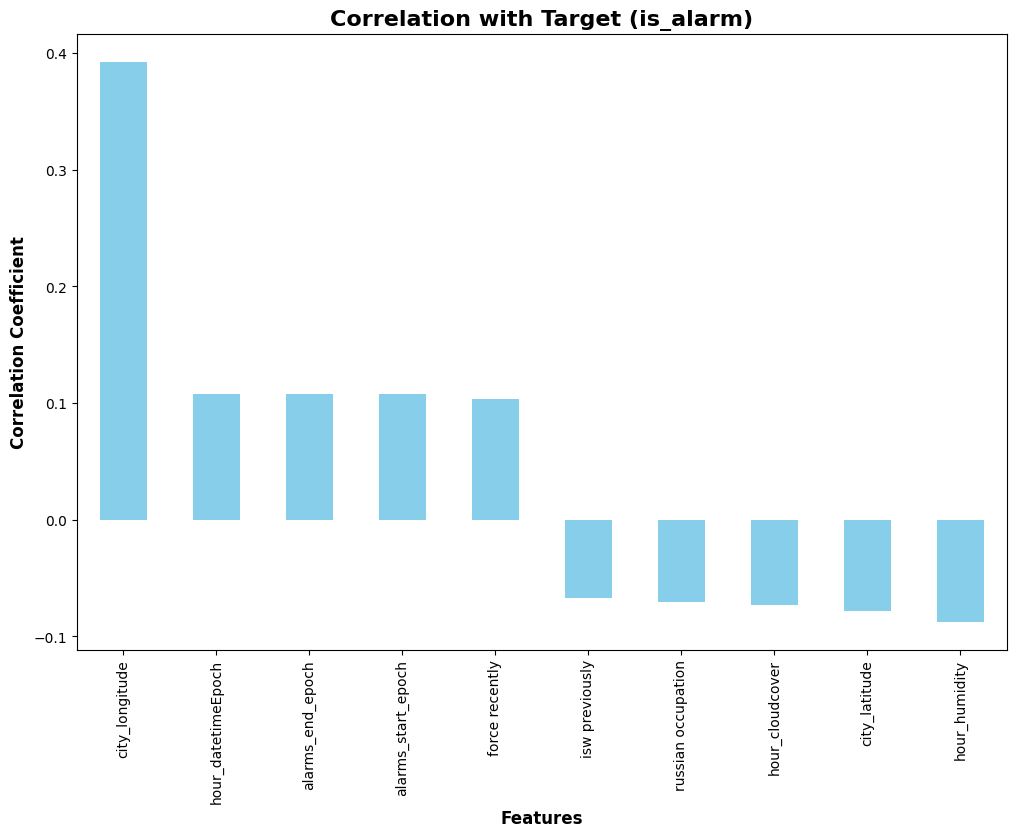

In [35]:
import matplotlib.pyplot as plt

corr = final_corr["is_alarm"].drop("is_alarm").sort_values(ascending=False)

plot_corr = pd.concat([corr.head(), corr.tail()])
plt.figure(figsize=(12, 8))
plot_corr.plot(kind="bar", color="skyblue")
plt.title("Correlation with Target (is_alarm)", fontsize=16, fontweight="bold")
plt.xlabel("Features", fontsize=12, fontweight="bold")
plt.ylabel("Correlation Coefficient", fontsize=12, fontweight="bold");

#### Key Insights:

   - `city_longitude` shows a **strong positive correlation** with the target (`is_alarm`). This suggests that **longitude** might be an important factor in predicting alarm occurrences.

   - Features like `hour_datetimeEpoch`, `alarms_end_epoch`, and `alarms_start_epoch` exhibit **moderate positive correlations**, indicating a reasonable relationship with the target.

   - Some features, such as `bakhmut`, `city_latitude`, and `hour_humidity`, show **negative correlations** with the target (`is_alarm`). Although these correlations are negative, they still provide valuable insights into how these features influence alarm occurrences.


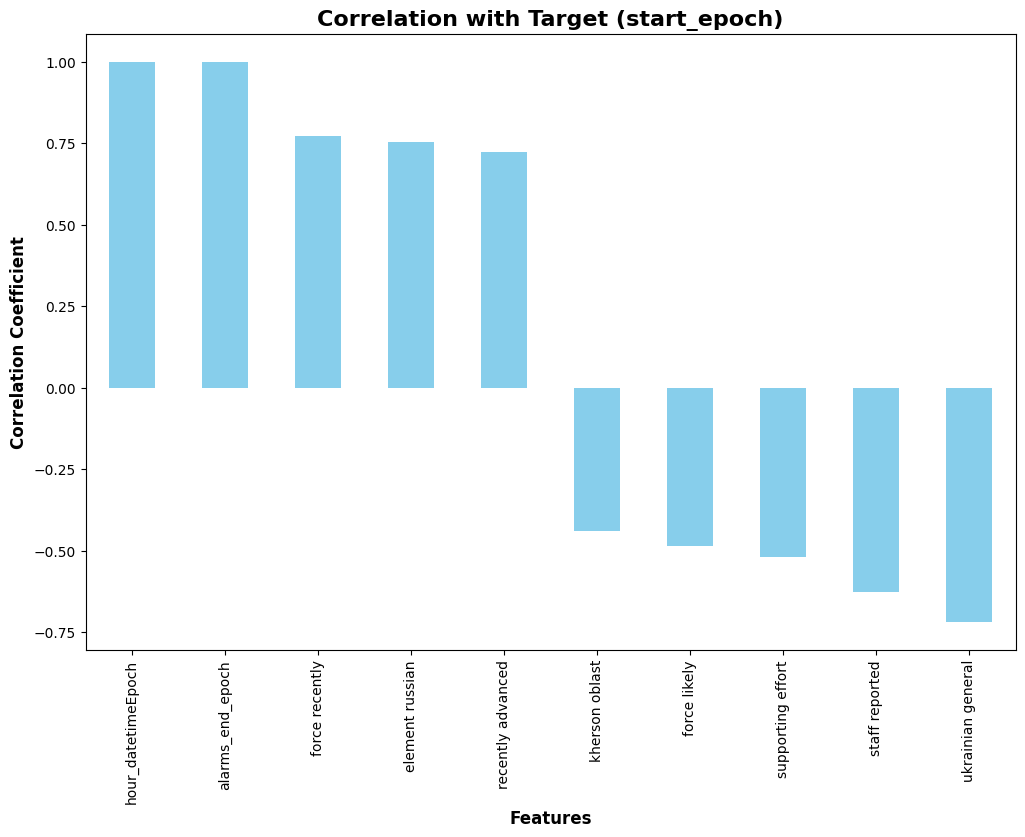

In [36]:
corr = final_corr["alarms_start_epoch"].drop("alarms_start_epoch").sort_values(ascending=False)

plot_corr = pd.concat([corr.head(), corr.tail()])
plt.figure(figsize=(12, 8))
plot_corr.plot(kind="bar", color="skyblue")
plt.title("Correlation with Target (start_epoch)", fontsize=16, fontweight="bold")
plt.xlabel("Features", fontsize=12, fontweight="bold")
plt.ylabel("Correlation Coefficient", fontsize=12, fontweight="bold");

#### Key Insights:

   - `hour_datetimeEpoch` and `alarms_end_epoch` show a very high correlation (close to 1). This suggests that the start and end times of alarms are closely related. It makes sense because the alarm's end time is often determined by its start time.
   - Features like `advanced`, `recently`, and `operating` also show relatively high positive correlations with `alarms_start_epoch`, indicating they share some common patterns or time dependencies with the alarm start times.

   - Features like `head`, `artillery`, and `unit` show moderate positive correlations. These could reflect situational factors where alarms are triggered during specific events or times.

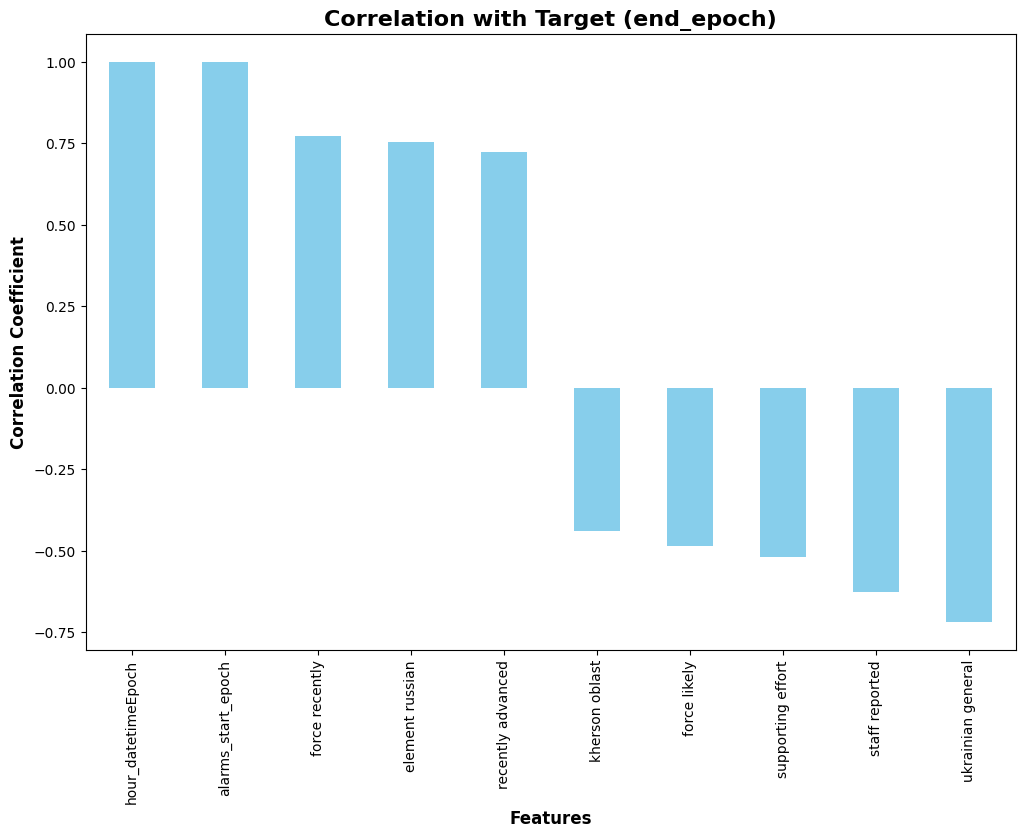

In [37]:
corr = final_corr["alarms_end_epoch"].drop("alarms_end_epoch").sort_values(ascending=False)

plot_corr = pd.concat([corr.head(), corr.tail()])
plt.figure(figsize=(12, 8))
plot_corr.plot(kind="bar", color="skyblue")
plt.title("Correlation with Target (end_epoch)", fontsize=16, fontweight="bold")
plt.xlabel("Features", fontsize=12, fontweight="bold")
plt.ylabel("Correlation Coefficient", fontsize=12, fontweight="bold");

This bar chart displays the same features as the previous plot.

### Conclusion

Based on the correlation analysis of the features with `alarms_start_epoch`,`alarms_end_epoch` and `is_alarm`, the following insights can be drawn:

   - **`hour_datetimeEpoch`** and **`alarms_end_epoch`** exhibit a very high positive correlation with `alarms_start_epoch`, indicating that alarm times are tightly linked.
   - Other features like **`advanced`**, **`recently`**, and **`operating`** also demonstrate moderate positive correlations with `alarms_start_epoch`, showing a connection to the timing of alarms and event-related factors.
   - Features such as **`head`**, **`artillery`**, and **`unit`** show moderate positive correlations.
   - The feature **`occupation`** has a negative correlation with `alarms_start_epoch`, which implies an inverse relationship where an increase in alarm start time might correspond to a decrease in the occupation value. Similarly, **`bakhmut`**, **`city_latitude`**, and **`hour_humidity`** show negative correlations with `is_alarm`, offering insights into factors that might decrease alarm occurrences.
   - The most important features based on correlation include **`city_longitude`**, **`advanced`**, and **`recently`**, all of which show substantial correlations with alarm occurrence.

### Saving final file

In [38]:
final.to_csv("../prepared_data/final_dataset.csv", index=False)

In [39]:
final_pca.to_csv("../prepared_data/final_dataset_pca.csv", index=False)